# <center>Laboratorium 5<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.

***Materiały przygotowujące:***


In [60]:
import main
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
from scipy.interpolate import barycentric_interpolate
from scipy import interpolate

def PolyCoefficients(x, coeffs):
    """ Returns a polynomial for ``x`` values for the ``coeffs`` provided.
    The coefficients must be in ascending order (``x**0`` to ``x**o``).
    """
    o = len(coeffs)
    y = 0
    for i in range(o):
        y += coeffs[i]*x**i
    return y

***Zadanie 1.***  
Zaimplementuj interpolacje pierwszego stopnia. Jako dane wejściowe dane są dwa wektory: argumentów oraz wartości funkcji. Funkcja ma zwracać współczynniki funkcji liniowych w poszczególnych przedziałach.

***Podpowiedź***

poszczególne współczynniki przyjmują wartość:

$ a=\frac{y_{k+1}-y_k}{x_{k+1}-x_k}$

$ b=y-a*x_0$

***Przykład***


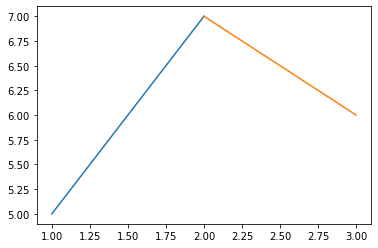

In [2]:
x=np.array([1,2,3])
y=np.array([5,7,6])

a,b=main.first_spline(x,y)
f = [[b[i],a[i]] for i in range(len(a))]

for i in range(len(x)-1):
    x_new = np.linspace(x[i], x[i+1],1000)
    plt.plot(x_new, PolyCoefficients(x_new, f[i]))

***Zadanie 2.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 1 oraz interpolacji barycentrycznej z węzłami równoodległymi (korzystając z kodu z poprzedniego zadania) dokonaj interpolacji funkcji: 
    
### $ f(x) = \frac{1}{25x^2+1}$

W przedziale \[-1, 1\]

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.


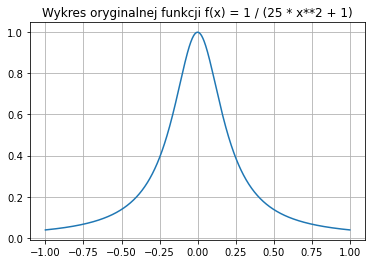

In [13]:
f = lambda x: 1 / (25 * x**2 + 1)
x = np.linspace(-1 + 1e-15, 1 - 1e-15, 1000)
y = f(x)
plt.plot(x, y)
plt.title('Wykres oryginalnej funkcji f(x) = 1 / (25 * x**2 + 1)')
plt.grid()
plt.show()

Dla rzędu = 5 błąd wynosi = 0.17966078428997656
Dla rzędu = 10 błąd wynosi = 0.2320531258415508
Dla rzędu = 15 błąd wynosi = 0.05896454394308481
Dla rzędu = 20 błąd wynosi = 0.06391260579660774
Dla rzędu = 50 błąd wynosi = 0.010176498114669141
Dla rzędu = 100 błąd wynosi = 0.0025127804291610323
Dla rzędu = 1000 błąd wynosi = 2.4740187518967893e-05


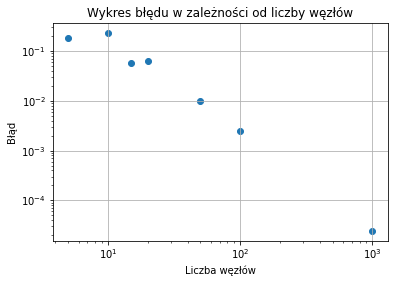

<function matplotlib.pyplot.show(close=None, block=None)>

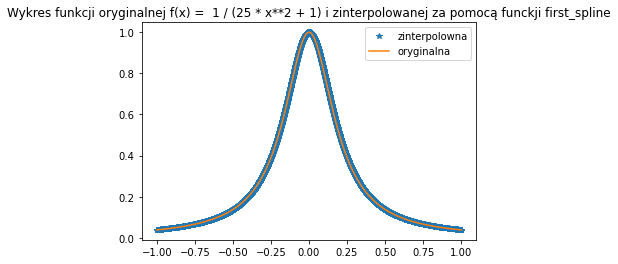

In [38]:
#Interpolacja z zadania 1
number_of_nodes = [5, 10, 15, 20, 50, 100, 1000]
error = []
for n in number_of_nodes:
    x = np.linspace(-1, 1, n)
    a,b = main.first_spline(x, f(x))
    f_c = [[b[i],a[i]] for i in range(len(a))]

    y_abs = np.array([])
    x_abs = np.array([])
    
    for i in range(len(x)-1):
        # Zmienne przechowujące punkty pomiędzy węzłami
        x_new = np.linspace(x[i], x[i+1],10)
        y_new = PolyCoefficients(x_new , f_c[i])

        # Zmienne przechowujące całą funkcję 
        y_abs = np.append(y_abs, y_new)
        x_abs = np.append(x_abs, x_new)
  
    print(f"Dla rzędu = {n} błąd wynosi = {main.L_inf(y_abs, f(x_abs))}")
    error.append(main.L_inf(y_abs, f(x_abs)))

fig = plt.scatter(number_of_nodes, error)
display(fig)

plt.xscale("log")
plt.yscale("log")
plt.title("Wykres błędu w zależności od liczby węzłów")
plt.xlabel("Liczba węzłów")
plt.ylabel("Błąd")
plt.grid()
plt.show()


plt.plot(x_abs,y_abs,"*", x,y)
plt.title("Wykres funkcji oryginalnej f(x) =  1 / (25 * x**2 + 1) i zinterpolowanej za pomocą funckji first_spline")
plt.legend(["zinterpolowna","oryginalna"])
plt.show

Dla rzędu = 5 błąd wynosi = 0.3170805973742683
Dla rzędu = 10 błąd wynosi = 0.1429039208434164
Dla rzędu = 15 błąd wynosi = 0.002483002943458046
Dla rzędu = 20 błąd wynosi = 0.012329494431740251
Dla rzędu = 50 błąd wynosi = 0.00014783017196262627
Dla rzędu = 100 błąd wynosi = 6.896291735003501e-06
Dla rzędu = 1000 błąd wynosi = 6.661338147750939e-16


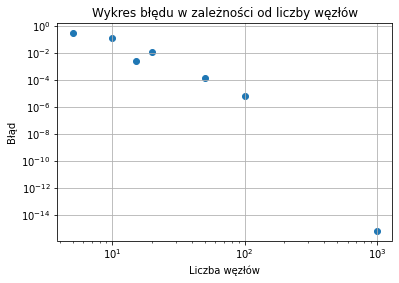

<function matplotlib.pyplot.show(close=None, block=None)>

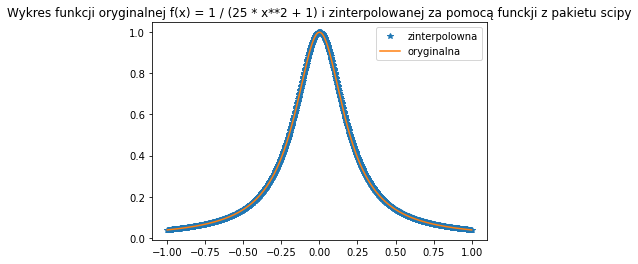

In [39]:
#Interpolacja funkcją z pakietu scipy
number_of_nodes = [5, 10, 15, 20, 50, 100, 1000]
f = lambda x: 1/(25 * x**2 + 1)
X = np.linspace(-1+1e-15,1-1e-15,1000)
error = []

for n in number_of_nodes:
    x_n = np.linspace(-1,1,n)
    y_n = f(x_n)
    tck = interpolate.splrep(x_n, y_n)
    new_points = interpolate.splev(X, tck)
    
    print(f"Dla rzędu = {n} błąd wynosi = {main.L_inf(new_points, f(X))}")
    error.append(main.L_inf(new_points, f(X)))

fig = plt.scatter(number_of_nodes, error)
display(fig)

plt.xscale("log")
plt.yscale("log")
plt.title("Wykres błędu w zależności od liczby węzłów")
plt.xlabel("Liczba węzłów")
plt.ylabel("Błąd")
plt.grid()
plt.show()


plt.plot(X,new_points,"*", X,f(X))
plt.title("Wykres funkcji oryginalnej f(x) = 1 / (25 * x**2 + 1) i zinterpolowanej za pomocą funckji z pakietu scipy")
plt.legend(["zinterpolowna","oryginalna"])
plt.show

Dla rzędu = 5 błąd wynosi = 0.2932469743301536
Dla rzędu = 10 błąd wynosi = 0.11190612202079131
Dla rzędu = 15 błąd wynosi = 0.012842187369426772
Dla rzędu = 20 błąd wynosi = 0.006657550609768248
Dla rzędu = 50 błąd wynosi = 0.00023414153780842994
Dla rzędu = 100 błąd wynosi = 5.694130146860488e-05
Dla rzędu = 1000 błąd wynosi = 1.2212453270876722e-15


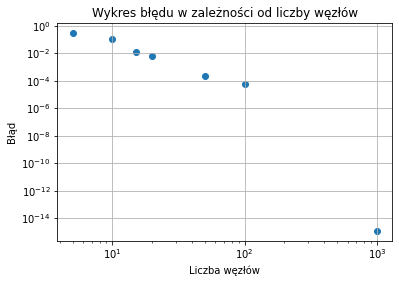

<function matplotlib.pyplot.show(close=None, block=None)>

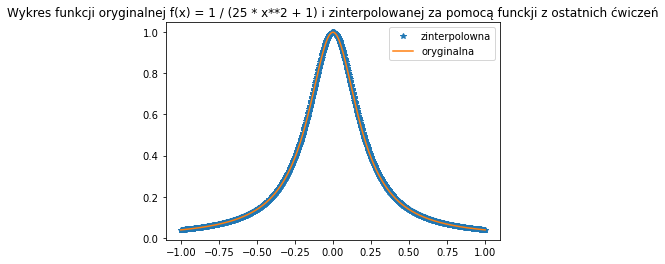

In [40]:
#Wykres interpolacji oryginalnej funkcji , za pomocą funckji z ostatnich ćwiczeń

number_of_nodes = [5, 10, 15, 20, 50, 100, 1000]
f = lambda x: 1/(25 * x**2 + 1)
X = np.linspace(-1+1e-15,1-1e-15,1000)
error = []

for N in number_of_nodes:
    x_i = np.linspace(-1,1,N)
    y_i = f(x_i)
    w_i = main.bar_czeb_weights(N-1)
    Y = main.barycentric_inte(x_i,y_i,w_i,X)
    
    print(f"Dla rzędu = {N} błąd wynosi = {main.L_inf(Y, f(X))}")
    error.append(main.L_inf(Y, f(X)))

fig = plt.scatter(number_of_nodes, error)
display(fig)

plt.xscale("log")
plt.yscale("log")
plt.title("Wykres błędu w zależności od liczby węzłów")
plt.xlabel("Liczba węzłów")
plt.ylabel("Błąd")
plt.grid()
plt.show()

plt.plot(x_i,Y,"*", X,f(X))
plt.title("Wykres funkcji oryginalnej f(x) = 1 / (25 * x**2 + 1) i zinterpolowanej za pomocą funckji z ostatnich ćwiczeń")
plt.legend(["zinterpolowna","oryginalna"])
plt.show


In [17]:
#1. Funckja sklejana 1 stopnia generuje największą wartość błędu. Dla węzłów z przedziału od 0 do 100 błąd należy 
#do przedziału od 10^-1 do 10^-3, a dla liczby węzłów równej 1000 błąd jest bliski wartości 10^-5
#2. Interpolacja wielomianowa daje mniejsze wartości błędu niż funkcja sklejana 1 stopnia, tj. dla węzłów z przedziału od 0 do 100 
#błąd należy do przedziału od 10^-1 d0 10^-5, dla liczby węzłów  równej 1000 jest to błąd o wartości błędu równej prawie 10^-15
#3. Najleszpsza okazała się być interpolacja za pomocą funckji scipy. Dla liczby węzłów równej 1000 wartość błędu wynosi prawie
#10^-16

***Zadanie 3.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 1 oraz interpolacji barycentrycznej z węzłami równoodległymi (korzystając z kodu z poprzedniego zadania) dokonaj interpolacji funkcji: 
    
### $ f(x) = cos(x)x^4$

W przedziale \[-1, 1\]

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.


Text(0.5, 1.0, 'Wykres funckji oryginalnej f(x) = cos(x)*x**4')

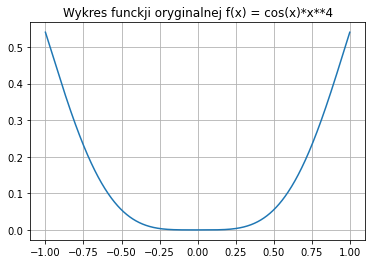

In [41]:
x = np.linspace(-1,1,1000)
f = lambda x: np.cos(x)*x**4
y = f(x)
plt.plot(x, y)
plt.grid()
plt.title("Wykres funckji oryginalnej f(x) = cos(x)*x**4")

Dla rzędu = 5 błąd wynosi = 0.06646007455778069
Dla rzędu = 10 błąd wynosi = 0.015401413229849115
Dla rzędu = 15 błąd wynosi = 0.006410107646945107
Dla rzędu = 20 błąd wynosi = 0.0034731750371035652
Dla rzędu = 50 błąd wynosi = 0.0005276404314355498
Dla rzędu = 100 błąd wynosi = 0.00012949199283335266
Dla rzędu = 1000 błąd wynosi = 1.2718723303439816e-06


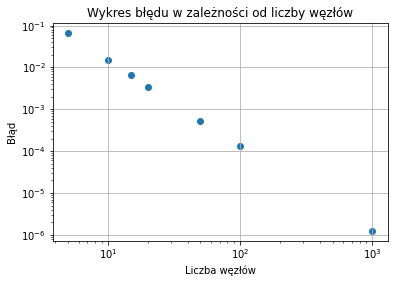

<function matplotlib.pyplot.show(close=None, block=None)>

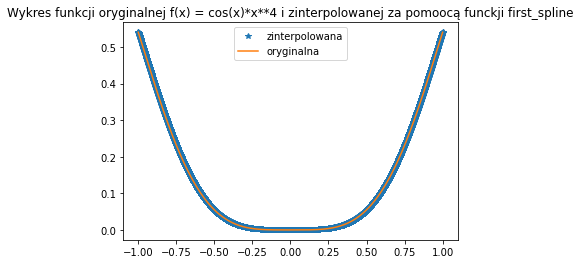

In [42]:
#Interpolacja z zadania 1
number_of_nodes = np.array([5, 10, 15, 20, 50, 100, 1000])
error = []
for n in number_of_nodes:
    x = np.linspace(-1, 1, n)
    a,b = main.first_spline(x, f(x))
    f_c = [[b[i],a[i]] for i in range(len(a))]

    y_abs = np.array([])
    x_abs = np.array([])
    
    for i in range(len(x)-1):
        # Zmienne przechowujące punkty pomiędzy węzłami
        x_new = np.linspace(x[i], x[i+1],10)
        y_new = PolyCoefficients(x_new , f_c[i])

        # Zmienne przechowujące całą funkcję 
        y_abs = np.append(y_abs, y_new)
        x_abs = np.append(x_abs, x_new)
  
    print(f"Dla rzędu = {n} błąd wynosi = {main.L_inf(y_abs, f(x_abs))}")
    error.append(main.L_inf(y_abs, f(x_abs)))

fig = plt.scatter(number_of_nodes, error)
display(fig)




plt.xscale("log")
plt.yscale("log")
plt.title("Wykres błędu w zależności od liczby węzłów")
plt.xlabel("Liczba węzłów")
plt.ylabel("Błąd")
plt.grid()
plt.show()


plt.plot(x_abs,y_abs,"*", x,f(x))
plt.title("Wykres funkcji oryginalnej f(x) = cos(x)*x**4 i zinterpolowanej za pomoocą funckji first_spline")
plt.legend(["zinterpolowana", "oryginalna"])
plt.show

Dla rzędu = 5 błąd wynosi = 0.023742151647194232
Dla rzędu = 10 błąd wynosi = 0.0041070248421595235
Dla rzędu = 15 błąd wynosi = 0.0008525884508368553
Dla rzędu = 20 błąd wynosi = 0.0002713826671931763
Dla rzędu = 50 błąd wynosi = 6.842225604097862e-06
Dla rzędu = 100 błąd wynosi = 4.2208019068734615e-07
Dla rzędu = 1000 błąd wynosi = 2.220446049250313e-16


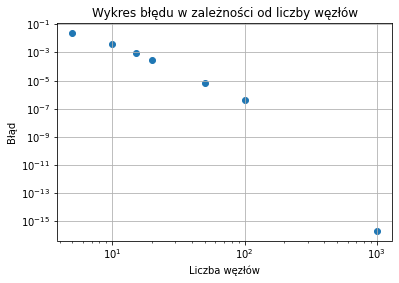

<function matplotlib.pyplot.show(close=None, block=None)>

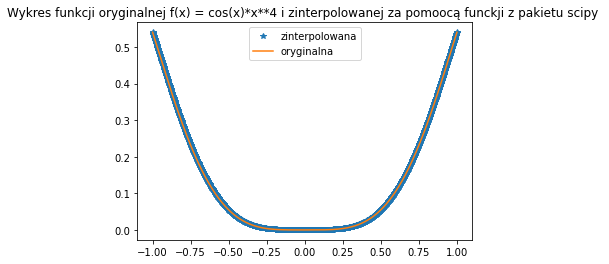

In [43]:
#Interpolacja funkcją z pakietu scipy
X = np.linspace(-1, 1, 1000)
error = []

for n in number_of_nodes:
    x_n = np.linspace(-1,1,n)
    y_n = f(x_n)
    tck = interpolate.splrep(x_n, y_n)
    new_points = interpolate.splev(X, tck)
    
    print(f"Dla rzędu = {n} błąd wynosi = {main.L_inf(new_points, f(X))}")
    error.append(main.L_inf(new_points, f(X)))

fig = plt.scatter(number_of_nodes, error)
display(fig)

plt.xscale("log")
plt.yscale("log")
plt.title("Wykres błędu w zależności od liczby węzłów")
plt.xlabel("Liczba węzłów")
plt.ylabel("Błąd")
plt.grid()
plt.show()


plt.plot(X,new_points,"*", x,y)
plt.title("Wykres funkcji oryginalnej f(x) = cos(x)*x**4 i zinterpolowanej za pomoocą funckji z pakietu scipy ")
plt.legend(["zinterpolowana", "oryginalna"])
plt.show

Dla rzędu = 5 błąd wynosi = 0.007893741532110643
Dla rzędu = 10 błąd wynosi = 0.0066958918601421075
Dla rzędu = 15 błąd wynosi = 0.0016802090962834137
Dla rzędu = 20 błąd wynosi = 0.0013974303225016667
Dla rzędu = 50 błąd wynosi = 0.0002070312526522795
Dla rzędu = 100 błąd wynosi = 5.048457464317056e-05
Dla rzędu = 1000 błąd wynosi = 9.992007221626409e-16


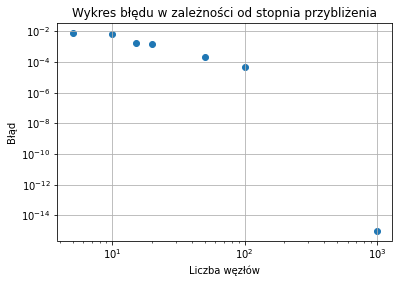

<function matplotlib.pyplot.show(close=None, block=None)>

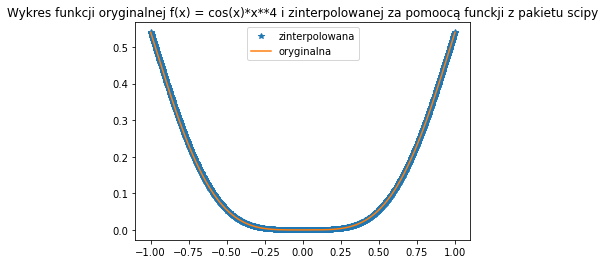

In [44]:
#Wykres interpolacji oryginalnej funkcji , za pomocą funckji z ostatnich ćwiczeń
number_of_nodes = [5, 10, 15, 20, 50, 100, 1000]
f = lambda x:  np.cos(x)*x**4
X = np.linspace(-1+1e-15,1-1e-15,1000)
error = []

for N in number_of_nodes:
    x_i = np.linspace(-1,1,N)
    y_i = f(x_i)
    w_i = main.bar_czeb_weights(N-1)
    Y = main.barycentric_inte(x_i,y_i,w_i,X)
    
    print(f"Dla rzędu = {N} błąd wynosi = {main.L_inf(Y, f(X))}")
    error.append(main.L_inf(Y, f(X)))

fig = plt.scatter(number_of_nodes, error)
display(fig)

plt.xscale("log")
plt.yscale("log")
plt.title("Wykres błędu w zależności od stopnia przybliżenia")
plt.xlabel("Liczba węzłów")
plt.ylabel("Błąd")
plt.grid()
plt.show()


plt.plot(X,Y,"*", x,y)
plt.title("Wykres funkcji oryginalnej f(x) = cos(x)*x**4 i zinterpolowanej za pomoocą funckji z pakietu scipy")
plt.legend(["zinterpolowana", "oryginalna"])
plt.show

In [ ]:
#1. Funckja sklejana 1 stopnia generuje największą wartość błędu. Dla węzłów z przedziału od 0 do 100 błąd należy 
#do przedziału od 10^-2 do 10^-4, a dla liczby węzłów równej 1000 błąd jest bliski wartości 10^-6
#2. Interpolacja wielomianowa daje mniejsze wartości błędu niż funkcja sklejana 1 stopnia, tj. dla węzłów z przedziału od 0 do 100 
#błąd należy do przedziału od 10^-3 do 10^-5, dla liczby węzłów  równej 1000 jest to błąd o wartości błędu równej nie wiele więcej niż 10^-15
#3. Najleszpsza okazała się być interpolacja za pomocą funckji scipy. Dla liczby węzłów równej 1000 wartość błędu wynosi prawie
#10^-16

***Zadanie 4.***  
Zaimplementuj funkcję interpolującą sklejaną trzeciego rzędu (splajn kubiczny). Jako dane wejściowe dane są dwa wektory: argumentów oraz wartości funkcji. Funkcja ma zwracać współczynniki funkcji wielomianowych w poszczególnych przedziałach.

***Podpowiedź***

https://medium.com/eatpredlove/natural-cubic-splines-implementation-with-python-edf68feb57aa



***Zadania 5.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 4: 
    
### $ f(x) = \frac{1}{25x^2+1}$

W przedziale \[-1, 1\]

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.


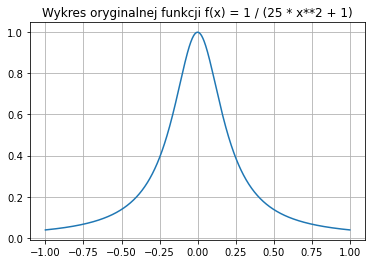

In [47]:
f = lambda x: 1 / (25 * x**2 + 1)
x = np.linspace(-1 + 1e-15, 1 - 1e-15, 1000)
y = f(x)
plt.plot(x, y)
plt.title('Wykres oryginalnej funkcji f(x) = 1 / (25 * x**2 + 1)')
plt.grid()
plt.show()

Dla rzędu = 5 błąd wynosi = 0.31708059737426797
Dla rzędu = 10 błąd wynosi = 0.1429039208434163
Dla rzędu = 15 błąd wynosi = 0.0024830029434582124
Dla rzędu = 20 błąd wynosi = 0.012329494431740362
Dla rzędu = 50 błąd wynosi = 0.00014783017196251524
Dla rzędu = 100 błąd wynosi = 6.896291735003501e-06
Dla rzędu = 1000 błąd wynosi = 4.440892098500626e-16


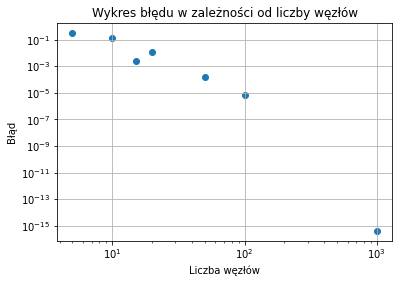

<function matplotlib.pyplot.show(close=None, block=None)>

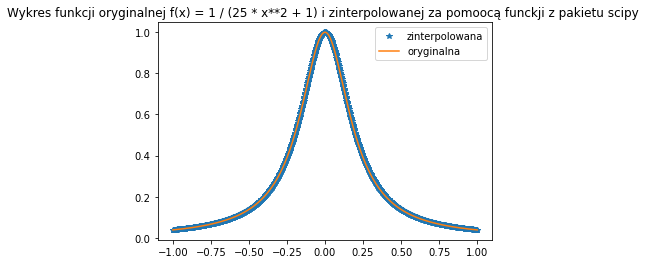

In [48]:
#Interpolacja funkcją z pakietu scipy
number_of_nodes = [5, 10, 15, 20, 50, 100, 1000]
f = lambda x: 1/(25*x**2 + 1)
X = np.linspace(-1, 1, 1000)
error = []

for n in number_of_nodes:
    x_n = np.linspace(-1,1,n)
    y_n = f(x_n)
    tck = interpolate.splrep(x_n, y_n)
    new_points = interpolate.splev(X, tck)

    print(f"Dla rzędu = {n} błąd wynosi = {main.L_inf(new_points, f(X))}")
    error.append(main.L_inf(new_points, f(X)))

fig = plt.scatter(number_of_nodes, error)
display(fig)

plt.xscale("log")
plt.yscale("log")
plt.title("Wykres błędu w zależności od liczby węzłów")
plt.xlabel("Liczba węzłów")
plt.ylabel("Błąd")
plt.grid()
plt.show()


plt.plot(X,new_points,"*", x,y)
plt.title("Wykres funkcji oryginalnej f(x) = 1 / (25 * x**2 + 1) i zinterpolowanej za pomoocą funckji z pakietu scipy ")
plt.legend(["zinterpolowana", "oryginalna"])
plt.show

Jacobi Method Output:
Dla rzędu = 100 błąd wynosi = 3.992243078193627
Jacobi Method Output:
Dla rzędu = 200 błąd wynosi = 4.596285615150392
Jacobi Method Output:
Dla rzędu = 400 błąd wynosi = 9.043447904651792


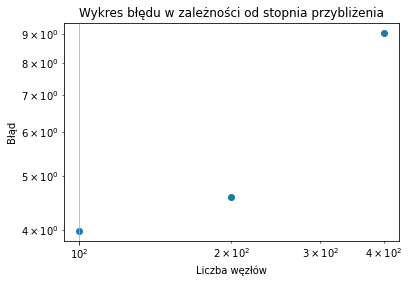

In [64]:
#Interpolacja funkcją z zadania 4
number_of_nodes = [100, 200, 400]
x = np.linspace(-1, 1, 1000)
f = lambda x: 1/(25*x**2 + 1)
error = []
for N in number_of_nodes:
    x_i = np.linspace(-1, 1, N)
    y_i = f(x_i)
    Y = np.array([]) #Przechowuje całość interpolowanej funkcji 
    X = np.array([])

    a,b,c = main.cubic_spline(x_i, y_i)
    coeff = [[a[i],b[i],c[i]] for i in range(len(a))]
    for i in range(len(x_i)-1):
        x_new = np.linspace(x_i[i], x_i[i+1],1000)
        y_new = PolyCoefficients(x_new, coeff[i])

        Y = np.append(Y, y_new)
        X = np.append(X, x_new)
        
    print(f"Dla rzędu = {N} błąd wynosi = {main.L_inf( f(X),Y)}")
    error.append(main.L_inf( f(X),Y))

fig = plt.scatter(number_of_nodes, error)
display(fig)

plt.xscale("log")
plt.yscale("log")
plt.title("Wykres błędu w zależności od stopnia przybliżenia")
plt.xlabel("Liczba węzłów")
plt.ylabel("Błąd")
plt.grid()
plt.show()


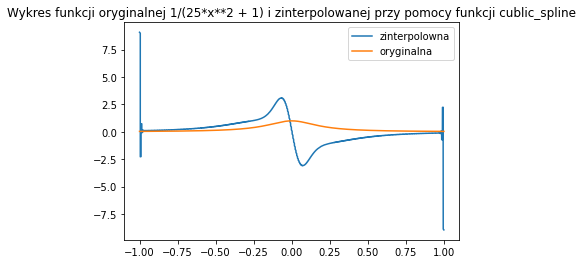

In [65]:
plt.plot(X,Y,x,f(x))
plt.title("Wykres funkcji oryginalnej f(x) = 1/(25*x**2 + 1) i zinterpolowanej przy pomocy funkcji cublic_spline")
plt.legend(["zinterpolowna","oryginalna"])

In [ ]:
# Funkcja cublic spline nie radzi sobie z interpolacją funkcji, zwłaszcza na brzegach przedziału wartości błędów są bardzo duże.
# Wraz z rosnącą wartością rzędu błąd funkcji cublic_spline rośnie, osiągając wartości prawie równe 10. 
#Funkcja z pakietu scipy radzi sobie o wiele lepiej i dla węzłów równych 1000 wartość błędu osiąga wartości 10^-16

***Zadanie 6.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 4: 
    
### $ f(x) = cos(x)x^4$

W przedziale \[-1, 1\]

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.


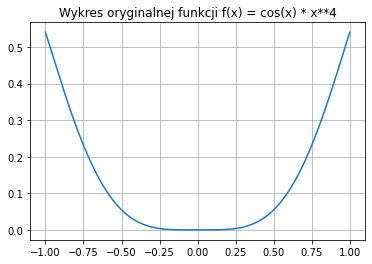

In [66]:
f = lambda x: np.cos(x)*x**4
x = np.linspace(-1 + 1e-15, 1 - 1e-15, 1000)
y = f(x)
plt.plot(x, y)
plt.title('Wykres oryginalnej funkcji f(x) = cos(x) * x**4')
plt.grid()
plt.show()

Dla rzędu = 5 błąd wynosi = 0.023742151647194232
Dla rzędu = 10 błąd wynosi = 0.0041070248421595235
Dla rzędu = 15 błąd wynosi = 0.0008525884508368553
Dla rzędu = 20 błąd wynosi = 0.0002713826671931763
Dla rzędu = 50 błąd wynosi = 6.842225604097862e-06
Dla rzędu = 100 błąd wynosi = 4.2208019068734615e-07
Dla rzędu = 1000 błąd wynosi = 2.220446049250313e-16


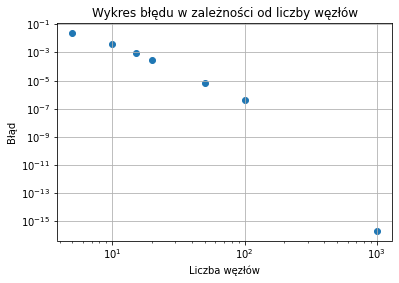

In [67]:
#Interpolacja funkcją z pakietu scipy
number_of_nodes = [5, 10, 15, 20, 50, 100, 1000]
X = np.linspace(-1, 1, 1000)
error = []

for n in number_of_nodes:
    x_n = np.linspace(-1,1,n)
    y_n = f(x_n)
    tck = interpolate.splrep(x_n, y_n)
    new_points = interpolate.splev(X, tck)
    
    print(f"Dla rzędu = {n} błąd wynosi = {main.L_inf(new_points, f(X))}")
    error.append(main.L_inf(new_points, f(X)))

fig = plt.scatter(number_of_nodes, error)
display(fig)

plt.xscale("log")
plt.yscale("log")
plt.title("Wykres błędu w zależności od liczby węzłów")
plt.xlabel("Liczba węzłów")
plt.ylabel("Błąd")
plt.grid()
plt.show()

Jacobi Method Output:
Dla rzędu = 100 błąd wynosi = 6.406627740277248
Jacobi Method Output:
Dla rzędu = 200 błąd wynosi = 14.673862739727486
Jacobi Method Output:
Dla rzędu = 400 błąd wynosi = 31.30389891952076


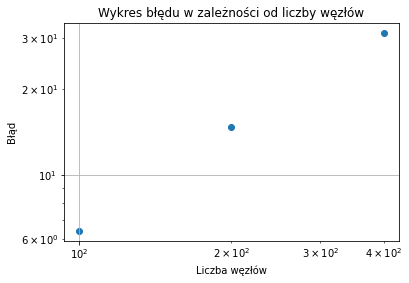

In [68]:
#Interpolacja z zadania 4
number_of_nodes = [100, 200, 400]
x = np.linspace(-1+1e-15, 1-1e-15,100)
f = lambda x: np.cos(x)*x**4
error = []

for N in number_of_nodes:
    x_i = np.linspace(-1, 1, N)
    y_i = f(x_i)
    Y = np.array([]) #Przechowuje całość interpolowanej funkcji 
    X = np.array([])

    a,b,c = main.cubic_spline(x_i, y_i)
    coeff = [[a[i],b[i],c[i]] for i in range(len(a))]

    for i in range(len(x_i)-1):
        x_new = np.linspace(x_i[i], x_i[i+1],1000)
        y_new = PolyCoefficients(x_new, coeff[i])

        Y = np.append(Y, y_new)
        X = np.append(X, x_new)
    
    print(f"Dla rzędu = {N} błąd wynosi = {main.L_inf( f(X),Y)}")
    error.append(main.L_inf( f(X),Y))

fig = plt.scatter(number_of_nodes, error)
display(fig)

plt.xscale("log")
plt.yscale("log")
plt.title("Wykres błędu w zależności od liczby węzłów")
plt.xlabel("Liczba węzłów")
plt.ylabel("Błąd")
plt.grid()
plt.show()

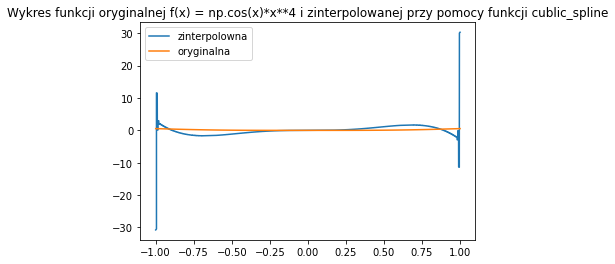

In [69]:
plt.plot(X,Y,x,f(x))
plt.title("Wykres funkcji oryginalnej f(x) = np.cos(x)*x**4 i zinterpolowanej przy pomocy funkcji cublic_spline")
plt.legend(["zinterpolowna","oryginalna"])

In [ ]:
# Funkcja cublic spline nie radzi sobie z interpolacją funkcji, zwłaszcza na brzegach przedziału wartości błędów są bardzo duże.
# Wraz z rosnącą wartością rzędu błąd funkcji cublic_spline rośnie, osiągając wartości większe od 30 . 
#Funkcja z pakietu scipy radzi sobie o wiele lepiej i dla węzłów równych 1000 wartość błędu osiąga wartości 10^-16

***Zadanie 7.***  
Dla funkcji:
### $f(x) = |sin(5x)|^3$

Porównać działanie funkcji zaimplementowanych w Zadaniu 1 oraz 4 oraz przedstawić wyniki na odpowiednich wykresach.

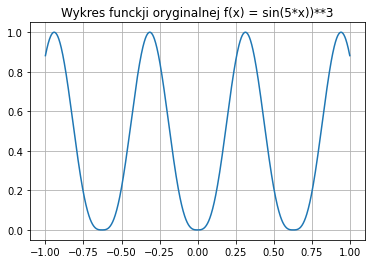

In [72]:
x = np.linspace(-1,1,1000)
f = lambda x: np.abs(np.sin(5*x))**3
y = f(x)
plt.plot(x, y)
plt.title("Wykres funckji oryginalnej f(x) = sin(5*x))**3")
plt.grid()
plt.show()

Dla rzędu = 100 błąd wynosi = 0.0037587103849996417
Dla rzędu = 200 błąd wynosi = 0.0009345623506675782
Dla rzędu = 400 błąd wynosi = 0.0002326218288676296
Dla rzędu = 1000 błąd wynosi = 3.711063265954273e-05


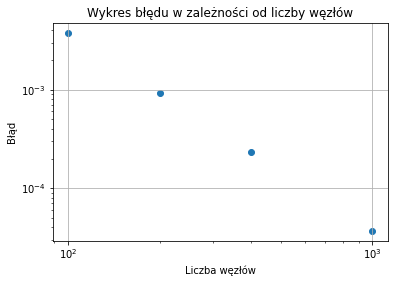

<function matplotlib.pyplot.show(close=None, block=None)>

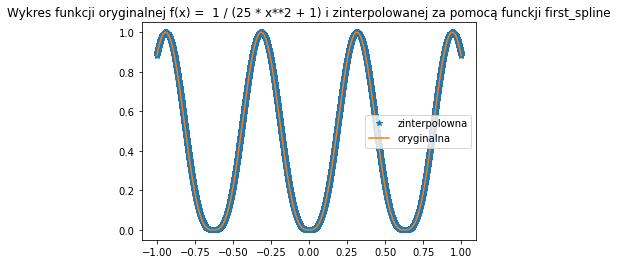

In [76]:
#Interpolacja z zadania 1
number_of_nodes = [100, 200, 400, 1000]
error = []
f = lambda x: np.abs(np.sin(5*x))**3
for n in number_of_nodes:
    x = np.linspace(-1, 1, n)
    a,b = main.first_spline(x, f(x))
    f_c = [[b[i],a[i]] for i in range(len(a))]

    y_abs = np.array([])
    x_abs = np.array([])
    
    for i in range(len(x)-1):
        # Zmienne przechowujące punkty pomiędzy węzłami
        x_new = np.linspace(x[i], x[i+1],10)
        y_new = PolyCoefficients(x_new , f_c[i])

        # Zmienne przechowujące całą funkcję 
        y_abs = np.append(y_abs, y_new)
        x_abs = np.append(x_abs, x_new)
  
    print(f"Dla rzędu = {n} błąd wynosi = {main.L_inf(y_abs, f(x_abs))}")
    error.append(main.L_inf(y_abs, f(x_abs)))

fig = plt.scatter(number_of_nodes, error)
display(fig)

plt.xscale("log")
plt.yscale("log")
plt.title("Wykres błędu w zależności od liczby węzłów")
plt.xlabel("Liczba węzłów")
plt.ylabel("Błąd")
plt.grid()
plt.show()


plt.plot(x_abs,y_abs,"*", x,y)
plt.title("Wykres funkcji oryginalnej f(x) = np.abs(np.sin(5*x))**3 i zinterpolowanej za pomocą funckji first_spline")
plt.legend(["zinterpolowna","oryginalna"])
plt.show

Jacobi Method Output:
Dla rzędu = 100 błąd wynosi = 666.9273478704844
Jacobi Method Output:
Dla rzędu = 200 błąd wynosi = 1249.6479532073574
Jacobi Method Output:
Dla rzędu = 400 błąd wynosi = 2405.551293801477


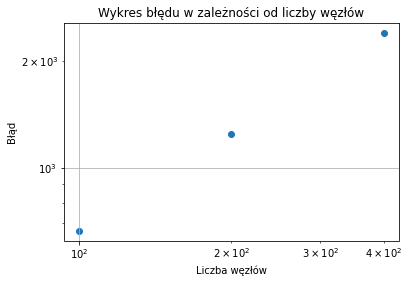

In [77]:
#Interpolacja z zadania 4
number_of_nodes = [100, 200, 400]
x = np.linspace(-1+1e-15, 1-1e-15,100)
f = lambda x: np.abs(np.sin(5*x))**3
error = []

for N in number_of_nodes:
    x_i = np.linspace(-1, 1, N)
    y_i = f(x_i)
    Y = np.array([]) #Przechowuje całość interpolowanej funkcji 
    X = np.array([])

    a,b,c = main.cubic_spline(x_i, y_i)
    coeff = [[a[i],b[i],c[i]] for i in range(len(a))]

    for i in range(len(x_i)-1):
        x_new = np.linspace(x_i[i], x_i[i+1],1000)
        y_new = PolyCoefficients(x_new, coeff[i])

        Y = np.append(Y, y_new)
        X = np.append(X, x_new)
    
    print(f"Dla rzędu = {N} błąd wynosi = {main.L_inf( f(X),Y)}")
    error.append(main.L_inf( f(X),Y))

fig = plt.scatter(number_of_nodes, error)
display(fig)

plt.xscale("log")
plt.yscale("log")
plt.title("Wykres błędu w zależności od liczby węzłów")
plt.xlabel("Liczba węzłów")
plt.ylabel("Błąd")
plt.grid()
plt.show()

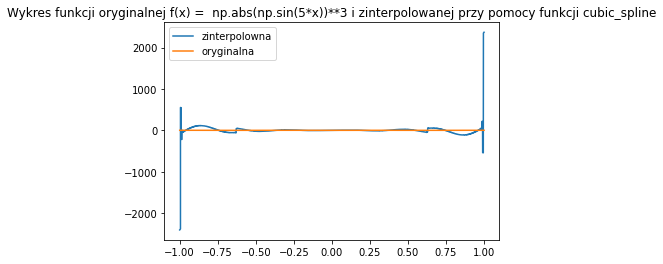

In [78]:
plt.plot(X,Y,x,f(x))
plt.title("Wykres funkcji oryginalnej f(x) =  np.abs(np.sin(5*x))**3 i zinterpolowanej przy pomocy funkcji cubic_spline")
plt.legend(["zinterpolowna","oryginalna"])

In [ ]:
# Funkcja cublic spline nie radzi sobie z interpolacją funkcji, zwłaszcza na brzegach przedziału wartości błędów są bardzo duże.
# Wraz z rosnącą wartością rzędu błąd funkcji cublic_spline rośnie, osiągając wartości większe od 2400 . Funkcja
# z zadania 1. prezentuje się dużo lepiej, przy licznie wezłów = 1000, błąd sięga prawie do wartości 10^-5